In [3]:
# Import libraries
import numpy as np
import pandas as pd
import re
import torch
import matplotlib.pyplot as plt
import fastai.tabular.all as fastai
np.set_printoptions(linewidth=130)

# dictionary: block and street to lat/long
latLong = {
  '212 Marsiling Cres': [1.44622, 103.77311],
  '1 Marsiling Dr': [1.44067, 103.77571],
  '2 Marsiling Dr': [1.43995, 103.77655],
  '6 Marsiling Dr': [1.44208, 103.77633],
  '22 Marsiling Dr': [1.44191, 103.77436],
  '23 Marsiling Dr': [1.44151, 103.77330],
  '24 Marsiling Dr': [1.44154, 103.77210],
  '30 Marsiling Dr': [1.44258, 103.77240],
  '31 Marsiling Dr': [1.44305, 103.77232],
  '32 Marsiling Dr': [1.44337, 103.77293],
  '202 Marsiling Dr': [1.44289, 103.77487],
  '204 Marsiling Dr': [1.44408, 103.77370],
  '206 Marsiling Dr': [1.44537, 103.77293],
  '12 Marsiling Lane': [1.44061, 103.77870],
  '12A Marsiling Lane': [1.44141, 103.77849],
  '13 Marsiling Lane': [1.44109, 103.77925],
  '15 Marsiling Lane': [1.44198, 103.77847],
  '17 Marsiling Lane': [1.44273, 103.77804],
  '18 Marsiling Lane': [1.44342, 103.77787],
  '19 Marsiling Lane': [1.44328, 103.77730],
  '180A Marsiling Rd': [1.43913, 103.77814],
  '180B Marsiling Rd': [1.43913, 103.77835],
  '125 Marsiling Rise': [1.43849, 103.77953],
  '129 Marsiling Rise': [1.43783, 103.77871],
  '130 Marsiling Rise': [1.43812, 103.77870],
  '131 Marsiling Rise': [1.43849, 103.77862],
  '132 Marsiling Rise': [1.43829, 103.77803],
  '570A Woodlands Ave 1': [1.43071, 103.79105],
  '570B Woodlands Ave 1': [1.43091, 103.79077],
  '571C Woodlands Ave 1': [1.43040, 103.78997],
  '693A Woodlands Ave 6': [1.43864, 103.80377],
  '693B Woodlands Ave 6': [1.43834, 103.80388],
  '693C Woodlands Ave 6': [1.43793, 103.80407],
  '780A Woodlands Cres': [1.44882, 103.80067],
  '780B Woodlands Cres': [1.44902, 103.80102],
  '780C Woodlands Cres': [1.44913, 103.80139],
  '780F Woodlands Cres': [1.44788, 103.80124],
  '782C Woodlands Cres': [1.44780, 103.80344],
  '782D Woodlands Cres': [1.44823, 103.80283],
  '573A Woodlands Dr 16': [1.43133, 103.79828],
  '573B Woodlands Dr 16': [1.43094, 103.79781],
  '573C Woodlands Dr 16': [1.43052, 103.79767],
  '574A Woodlands Dr 16': [1.43011, 103.79710],
  '574B Woodlands Dr 16': [1.42970, 103.79685],
  '886A Woodlands Dr 50': [1.43830, 103.79489],
  '886B Woodlands Dr 50': [1.43824, 103.79387],
  '886D Woodlands Dr 50': [1.43794, 103.79490],
  '887B Woodlands Dr 50': [1.43710, 103.79406],
  '887C Woodlands Dr 50': [1.43697, 103.79468],
  '694A Woodlands Dr 62': [1.43916, 103.80419],
  '694B Woodlands Dr 62': [1.43926, 103.80517],
  '694C Woodlands Dr 62': [1.43862, 103.80561],
  '694D Woodlands Dr 62': [1.43843, 103.80544],
  '717A Woodlands Dr 70': [1.44049, 103.79836],
  '717B Woodlands Dr 70': [1.44135, 103.79861],
  '784B Woodlands Rise': [1.44565, 103.80499],
  '784C Woodlands Rise': [1.44602, 103.80500],
  '785B Woodlands Rise': [1.44636, 103.80527],
  '101 Woodlands St 13': [1.43612, 103.78206],
  '102 Woodlands St 13': [1.43611, 103.78117],
  '111 Woodlands St 13': [1.43784, 103.78219],
  '145 Woodlands St 13': [1.43612, 103.77324],
  '146 Woodlands St 13': [1.43612, 103.77409],
  '148 Woodlands St 13': [1.43578, 103.77402],
  '149 Woodlands St 13': [1.43578, 103.77303],
  '151 Woodlands St 13': [1.43546, 103.77423],
  '152 Woodlands St 13': [1.43505, 103.77424],
  '155 Woodlands St 13': [1.43477, 103.77459],
  '157 Woodlands St 13': [1.43437, 103.77480],
  '158 Woodlands St 13': [1.43407, 103.77478],
  '159 Woodlands St 13': [1.43371, 103.77459],
  '160 Woodlands St 13': [1.43337, 103.77469],
  '161 Woodlands St 13': [1.43337, 103.77367],
  '166 Woodlands St 13': [1.43374, 103.77543],
  '302A Woodlands St 31': [1.43185, 103.77527],
  '310 Woodlands St 31': [1.43009, 103.77598],
  '311 Woodlands St 31': [1.43185, 103.77527],
  '313 Woodlands St 31': [1.43049, 103.77617],
  '314 Woodlands St 31': [1.43119, 103.77607],
  '316 Woodlands St 31': [1.43149, 103.77637],
  '317 Woodlands St 31': [1.43190, 103.77627],
  '318 Woodlands St 31': [1.43185, 103.77731],
  '319 Woodlands St 31': [1.43150, 103.77740],
  '411 Woodlands St 41': [1.42852, 103.77282],
  '419 Woodlands St 41': [1.42852, 103.77457],
  '818 Woodlands St 82': [1.44167, 103.79018],
  '820 Woodlands St 82': [1.44101, 103.79014],
  '848 Woodlands St 82': [1.44181, 103.79198],
  '849 Woodlands St 82': [1.44147, 103.79199],
  '834 Woodlands St 83': [1.44009, 103.79108],
}

# clean up data: area, date, floor, price
def load_csv():
  return pd.read_csv('./data/2305_3rm_woodlands.csv')
def price_cleanup(df):
  df['price'] = df.price.apply(lambda x:float(x.replace('$','').replace(',','')) if isinstance(x,str) else x)
  return df
def area_cleanup(df):
  df['area'] = df.area.str.split('\n',expand=True)[0].astype(float) if df.area.dtype != 'float64' else df.area
  return df  
def date_cleanup(df):
  df['date'] = pd.to_datetime(df.date, format="%m/%d/%y")
  df['date'] = df.date.apply(lambda x:float(x.toordinal()) if not isinstance(x,float) else x)
  return df
floor_dict = { f'0{i*3+1} to 0{i*3+3}' if i < 3 else f'{i*3+1} to {i*3+3}': i*3+2  for i in range(11)  }
def floor_cleanup(df):
  df['floor'] = df.floor.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  return df
def lease_to_float(str):
  result = re.search("(\d+) years\\n(\d+) months", str)
  if (result is None):
    result = re.search("(\d+) years", str)
    year = result.groups()[0]
    return float(year)
  year,month = result.groups()
  return float(year)+float(month)/12
def lease_cleanup(df):
  df['lease'] = df.lease.apply(lambda x:lease_to_float(x) if isinstance(x,str) else x)
  return df
def lat_long(df):
  adds = (df.block + df.street).str.replace(u'\xa0', u' ')
  latLongs = adds.apply(lambda x: latLong[x])
  df['lat'] = latLongs.apply(lambda x: x[0])
  df['long'] = latLongs.apply(lambda x: x[1])
  df.drop(['block', 'street'], axis=1, inplace=True)
  return df


def load_and_cleanup():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  floor_cleanup(df)
  date_cleanup(df)
  lease_cleanup(df)
  lat_long(df)
  return df

df = load_and_cleanup()
df.describe()
df.head()


,floor,area,year,lease,price,date,lat,long
0,2.0,67.0,1977,53.166667,300500.0,738641.0,1.44154,103.77210
1,11.0,65.0,1976,51.750000,315000.0,738641.0,1.44198,103.77847
2,23.0,67.0,2015,91.250000,430000.0,738641.0,1.43913,103.77814
3,8.0,68.0,2018,94.416667,445000.0,738641.0,1.43834,103.80388
4,8.0,68.0,2018,94.416667,450000.0,738641.0,1.43862,103.80561


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def min_coords(lat,long):
  return (np.abs((lats-lat)).argmin(), np.abs(longs-long).argmin())

mrts = {
  'Marsiling': {'coords': (1.43278,103.77397), 'marker': '<'},
  'Woodlands': {'coords': (1.43718,103.78646), 'marker': 's'},
  'Admiralty': {'coords': (1.44063, 103.80098), 'marker': '>'},
  'Woodlands South': {'coords': (1.42735,103.79314), 'marker': 'v'},
  'Woodlands North': {'coords': (1.44827,103.78536), 'marker': '^'},
}

In [181]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "area", "lease", "date", "lat","long"],y_names=["price"],valid_idx=range(60))
dls.show_batch()

,floor,area,lease,date,lat,long,price
0,5.0,68.0,61.333332,738490.0,1.43612,103.773239,358000.0
1,8.0,73.0,53.333332,738521.0,1.44258,103.772400,349000.0
2,5.0,65.0,51.166668,738307.0,1.44067,103.775711,315000.0
3,2.0,67.0,92.000000,738337.0,1.43913,103.778351,379000.0
4,8.0,68.0,95.166664,738307.0,1.44636,103.805267,400000.0
5,5.0,71.0,63.916668,738307.0,1.44328,103.777298,320000.0
6,5.0,67.0,61.583332,738429.0,1.43612,103.782059,348000.0
7,5.0,67.0,90.000000,738490.0,1.43091,103.790771,400000.0
8,14.0,68.0,94.416664,738552.0,1.42970,103.796852,464000.0
9,14.0,68.0,94.750000,738490.0,1.44565,103.804993,445000.0


SuggestedLRs(valley=0.0008317637839354575, slide=6.309573450380412e-07)

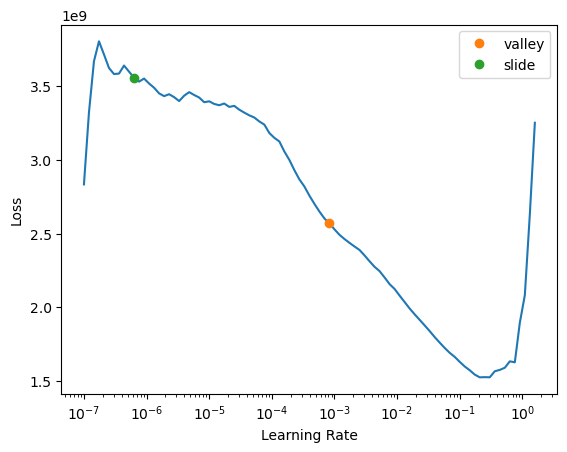

In [182]:
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.price.min()*0.9, df.price.max()*1.1),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


In [216]:
learn = fastai.tabular_learner(
  dls,y_range=(df.price.min()*0.9, df.price.max()*1.1),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit_one_cycle(100,1e-2)
learn.validate()


Better model found at epoch 0 with valid_loss value: 16341.46875.


(#2) [267043600.0,16341.46875]

In [231]:
# predict prices on map
row = df.drop(['price','year'], axis=1).iloc[0].copy()
cats = ['floor', 'area', 'lease', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*3
n2 = 3*3
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

In [239]:
import itertools
all_list = [
  [df.floor.quantile(0.25), df.floor.quantile(0.55), df.floor.quantile(0.75),],
  [df.area.quantile(0.25), df.area.quantile(0.55), df.area.quantile(0.75),],
  [df.lease.quantile(0.25), df.lease.quantile(0.55), df.lease.quantile(0.75),],
  [df.date.quantile(0.25), df.date.quantile(0.55), df.date.quantile(0.75),],
            ]
perm_list = list(itertools.product(*all_list))
# predict prices on map
row = df.drop(['price','year'], axis=1).iloc[0].copy()
cats = ['floor', 'area', 'lease', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*5
n2 = 3*5
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    preds = []
    for k in perm_list:
      row['floor'] = k[0]
      row['area'] = k[1]
      row['lease'] = k[2]
      row['date'] = k[3]
      _, yPred, _ = learn.predict(row)
      preds.append(yPred.item())
    prices[i][j] = np.mean(preds)

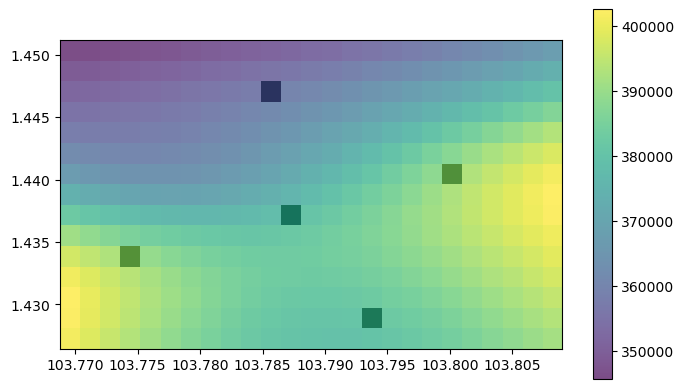

In [240]:
mrt_map = np.zeros((n2,n1))
for mrt,x in mrts.items():
  (i,j) = min_coords(*x['coords'])
  mrt_map[i][j] = 1

fig,ax=plt.subplots()
#mrt
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
#color map
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)
fig.set_figwidth(8.1)

plt.show()

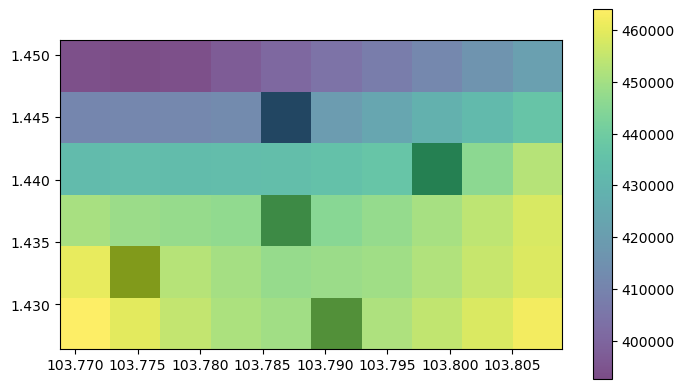

In [ ]:
mrt_map = np.zeros((n2,n1))
for mrt,x in mrts.items():
  (i,j) = min_coords(*x['coords'])
  mrt_map[i][j] = 1

fig,ax=plt.subplots()
#mrt
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
#color map
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)
fig.set_figwidth(8.1)

plt.show()

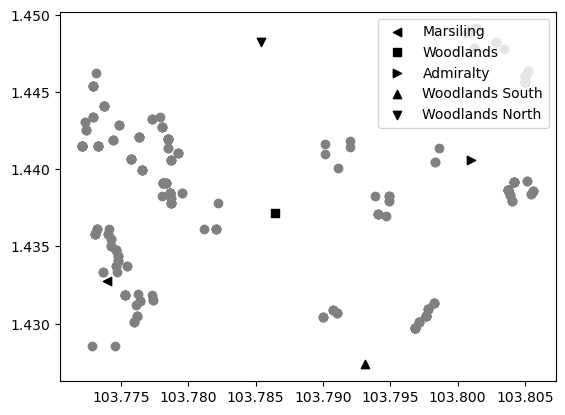

In [74]:
fig,ax2=plt.subplots()

ax2.scatter(df.long,df.lat,c='grey')
for mrt,x in mrts.items():
  ax2.scatter([x['coords'][1]], [x['coords'][0]],marker=x['marker'],c='black',label=mrt)
ax2.legend(loc='upper right')

plt.show()


In [8]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_squared_error
m4 = rf().fit(trn_xs,trn_y)

mse = mean_squared_error(val_y, m4.predict(val_xs),squared=False)
trn_mse = mean_squared_error(trn_y, m4.predict(trn_xs), squared=False)
print(f"{trn_mse} vs {mse}.")

6675.227262087143 vs 17644.10360068539.


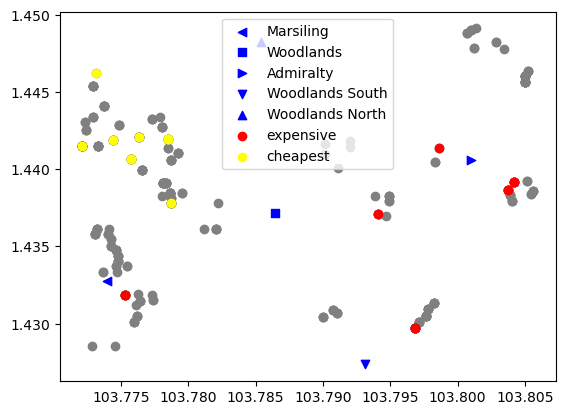

In [14]:
expensive = df.nlargest(10,'price')
cheapest = df.nsmallest(10,'price')

largestCoords = []
smallestCoords = []
for i,row in expensive.iterrows():
  largestCoords.append((df.iloc[i].lat, df.iloc[i].long))
for i,row in cheapest.iterrows():
  smallestCoords.append((df.iloc[i].lat, df.iloc[i].long))
fig,ax2=plt.subplots()

ax2.scatter(df.long,df.lat,c='grey')
for mrt,x in mrts.items():
  ax2.scatter([x['coords'][1]], [x['coords'][0]],marker=x['marker'],c='blue',label=mrt)
ax2.scatter([y for _,y in largestCoords], [x for x,_ in largestCoords],marker='o',c='red',label='expensive')
ax2.scatter([y for _,y in smallestCoords], [x for x,_ in smallestCoords],marker='o',c='yellow',label='cheapest')
ax2.legend(loc='upper center')

plt.show()



In [78]:
cheapest.describe()

,floor,area,year,lease,price,date,lat,long
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.40000,65.800000,1977.400000,54.166667,274888.800000,738331.200000,1.441686,103.776144
std,2.75681,3.457681,3.657564,3.615382,11665.299394,73.290594,0.002054,0.002403
min,2.00000,60.000000,1974.000000,51.000000,248888.000000,738276.000000,1.437830,103.772100
25%,2.00000,65.000000,1976.000000,52.208333,268000.000000,738276.000000,1.440887,103.774698
50%,5.00000,65.000000,1976.000000,52.708333,280000.000000,738291.500000,1.441945,103.776020
75%,5.00000,66.500000,1977.000000,54.104167,282250.000000,738368.000000,1.441980,103.778470
max,11.00000,74.000000,1985.000000,61.666667,285000.000000,738490.000000,1.446220,103.778710


In [79]:
expensive.describe()


,floor,area,year,lease,price,date,lat,long
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,15.500000,68.000000,2017.200000,93.891667,471368.800000,738502.00000,1.434821,103.794591
std,7.382412,1.154701,1.135292,1.262010,12988.684005,95.19337,0.004671,0.010785
min,11.000000,67.000000,2015.000000,90.833333,458000.000000,738307.00000,1.429700,103.775270
25%,11.000000,67.250000,2016.250000,93.500000,461766.000000,738490.00000,1.430238,103.794758
50%,12.500000,68.000000,2018.000000,94.458333,467000.000000,738490.00000,1.434475,103.796850
75%,14.000000,68.000000,2018.000000,94.770833,483500.000000,738573.00000,1.439030,103.802480
max,32.000000,71.000000,2018.000000,94.833333,490000.000000,738611.00000,1.441350,103.804190


In [194]:
from sklearn.linear_model import LinearRegression

def rmse(y1,y2):
  return np.sqrt(np.mean(np.square(y1-y2)))
xs_lin = df.drop(['price','year','lat','long'], axis=1)
y = df.price
m = LinearRegression().fit(xs_lin,y)
m.score(xs_lin,y)
rmse(y,m.predict(xs_lin))

17510.53809781898

In [204]:
[floor_coef, area_coef, lease_coef, date_coef] = m.coef_
pred = m.predict(xs_lin.iloc[0].values.reshape(1,-1))
print(f'{pred} vs {df.iloc[0].price}')

[318553.90553789] vs 300500.0


/home/kelvinsoh/mambaforge/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
lease_median = df.lease.median()
floor_median = df.floor.median()
area_median = df.area.median()
date_median = df.date.median()
df2 = df.copy()
df2['price'] = df.price + (lease_median-df.lease)*lease_coef + (floor_median-df.floor)*floor_coef + (area_median-df.area)*area_coef + (date_median-df.date)*date_coef

df2.head()


,floor,area,year,lease,price,date,lat,long
0,2.0,67.0,1977,53.166667,340528.402538,738641.0,1.44154,103.77210
1,11.0,65.0,1976,51.750000,349158.055838,738641.0,1.44198,103.77847
2,23.0,67.0,2015,91.250000,333254.121255,738641.0,1.43913,103.77814
3,8.0,68.0,2018,94.416667,362461.527715,738641.0,1.43834,103.80388
4,8.0,68.0,2018,94.416667,367461.527715,738641.0,1.43862,103.80561


In [125]:
df.head()

,floor,area,year,lease,price,date,lat,long
0,2.0,67.0,1977,53.166667,300500.0,738641.0,1.44154,103.77210
1,11.0,65.0,1976,51.750000,315000.0,738641.0,1.44198,103.77847
2,23.0,67.0,2015,91.250000,430000.0,738641.0,1.43913,103.77814
3,8.0,68.0,2018,94.416667,445000.0,738641.0,1.43834,103.80388
4,8.0,68.0,2018,94.416667,450000.0,738641.0,1.43862,103.80561


In [162]:
dls = fastai.TabularDataLoaders.from_df(df2,procs=[fastai.Normalize],cont_names=["lat","long"],y_names=["price"],valid_idx=range(60))
dls.show_batch()

,lat,long,price
0,1.43830,103.794891,371043.53125
1,1.43913,103.778351,329004.78125
2,1.43864,103.803772,380361.71875
3,1.43849,103.778618,354640.84375
4,1.44154,103.772102,343257.40625
5,1.43578,103.773033,366786.96875
6,1.43011,103.797096,380717.34375
7,1.44328,103.777298,358836.75000
8,1.44154,103.772102,345970.46875
9,1.43710,103.794060,350212.56250


SuggestedLRs(valley=0.0004786300996784121, slide=6.309573450380412e-07)

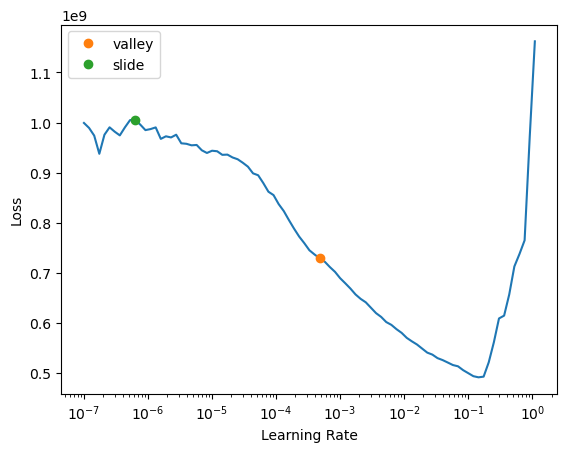

In [163]:
learn = fastai.tabular_learner(dls,y_range=(df2.price.min()*0.9, df2.price.max()*1.1),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))

In [164]:
learn = fastai.tabular_learner(
  dls,y_range=(df2.price.min()*0.9, df2.price.max()*1.1),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit(100,lr=1e-2)

epoch,train_loss,valid_loss,RMSE,time
0,4321917952.000000,1891045888.000000,43486.160156,00:00
1,3308475904.000000,344403328.000000,18558.107422,00:00
2,2454971392.000000,957193792.000000,30938.548828,00:00
3,2103816320.000000,444984736.000000,21094.662109,00:00
4,1721751168.000000,496566080.000000,22283.763672,00:00
5,1513089536.000000,445896512.000000,21116.261719,00:00
6,1325163648.000000,336771936.000000,18351.347656,00:00
7,1175310464.000000,549767552.000000,23447.123047,00:00
8,1072029504.000000,399908192.000000,19997.705078,00:00
9,964803200.000000,311927488.000000,17661.468750,00:00


In [165]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 16551.693359375.


(#2) [273958528.0,16551.693359375]

In [166]:
# predict prices on map
row = df2.drop('price', axis=1).iloc[0].copy()
cats = ['floor', 'area', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 5*5
n2 = 3*5
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

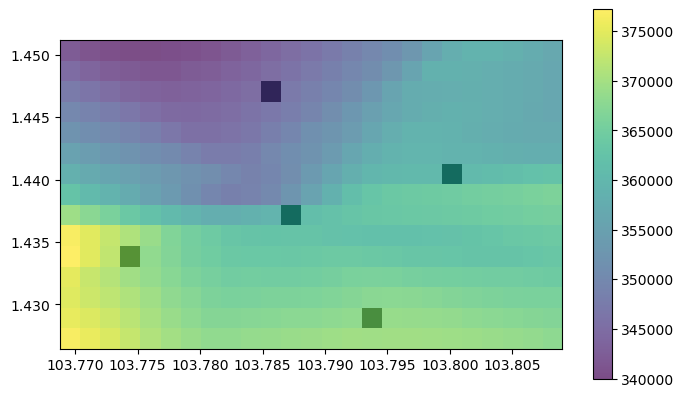

In [167]:
fig,ax=plt.subplots()
#mrt
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
#color map
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)
fig.set_figwidth(8.1)

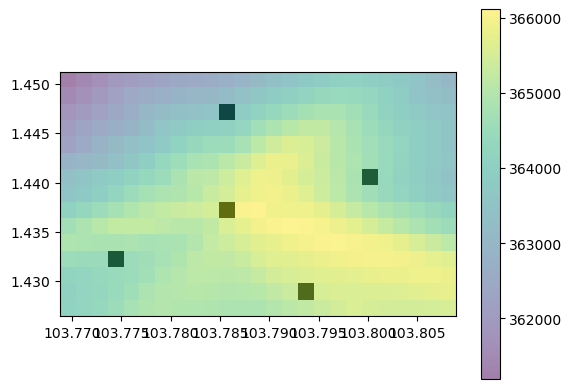

In [132]:

fig,ax=plt.subplots()
shw = ax.imshow(mrt, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=1,cmap='Greys')
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.5)
bar = plt.colorbar(shw)
plt.show()

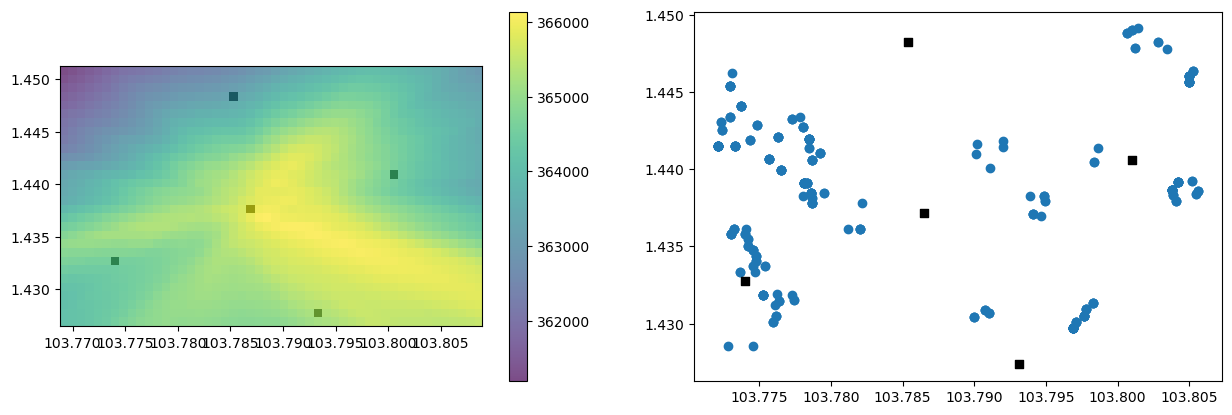

In [169]:
def min_coords(lat,long):
  return (np.abs((lats-lat)).argmin(), np.abs(longs-long).argmin())

marsiling = (1.43278,103.77397)
woodlands = (1.43718,103.78646)
admiralty = (1.44063, 103.80098)
woodlands_south = (1.42735,103.79314)
woodlands_north = (1.44827,103.78536)
mrts = [woodlands, woodlands_north, woodlands_south, marsiling, admiralty]
mrt_map = np.zeros((n2,n1))
for mrt in mrts:
  (i,j) = min_coords(*mrt)
  mrt_map[i][j] = 1

fig,(ax,ax2)=plt.subplots(1,2)
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7)
bar = plt.colorbar(shw)

ax2.scatter(df.long,df.lat)
ax2.scatter([y for _,y in mrts], [x for x,_ in mrts],marker='s',c='black',)
fig.set_figwidth(15)

plt.show()


In [158]:
[x for x,_ in mrts]
[y for _,y in mrts]

[103.78646, 103.78536, 103.79314, 103.77397, 103.80098]